In [8]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Convert the file to csv
#!pip install openpyxl
#data = pd.read_excel ('WildFire_Prediction_Data_Set.xlsx', engine='openpyxl') 
#data.to_csv('Data.csv', sep=',', index=False)

In [10]:
df = pd.read_csv('Data.csv')
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [11]:
print('The empty values: \n', df.isnull().sum().sum())

The empty values: 
 0


In [12]:
print(df.describe())

              NDVI           LST  BURNED_AREA
count  1713.000000   1713.000000  1713.000000
mean      0.555665  14622.802073     4.674973
std       0.092847    366.927861     0.583791
min       0.030735  13137.000000     3.000000
25%       0.501276  14406.000000     4.521951
50%       0.565181  14645.750000     4.920635
75%       0.620987  14881.300000     5.000000
max       0.781723  15611.570513     9.000000


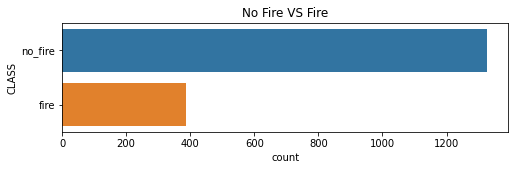

No Fire: 1327
Fire: 386


In [13]:
plt.figure(figsize = (8, 2))
sns.countplot(y = df.CLASS)
plt.title('No Fire VS Fire')
plt.show()
print('No Fire:', df['CLASS'].value_counts()[0])
print('Fire:', df['CLASS'].value_counts()[1])

In [11]:
df = df.reindex(np.random.permutation(df.index))
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print('X Shape:', X.shape)
print('y shape:', y.shape)

X Shape: (1713, 3)
y shape: (1713,)


In [16]:
# Encoding the class column [1: No fire, 0: Fire]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
firstModel = LogisticRegression(
    solver="liblinear", max_iter=120, random_state=0)
firstModel.fit(X_train, y_train)

LogisticRegression(max_iter=120, random_state=0, solver='liblinear')

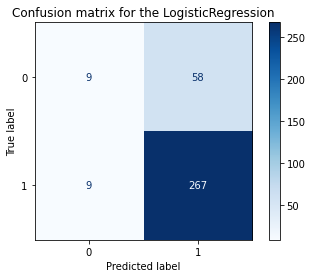

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(firstModel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for the LogisticRegression')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = firstModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)
print('\nAccuracy score: ', accuracy_score(y_test, y_pred))

Confusion matrix: 
 [[  9  58]
 [  9 267]]

Accuracy score:  0.8046647230320699


In [22]:
# Decession Tree
from sklearn.tree import DecisionTreeClassifier
secondModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
secondModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

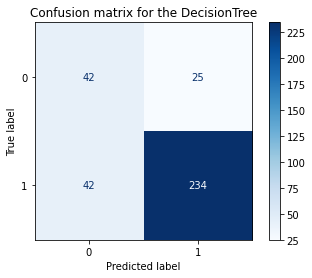

In [23]:
plot_confusion_matrix(secondModel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for the DecisionTree')
plt.show()

In [33]:
y_pred2 = secondModel.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix for the DecisionTree: \n', cm2)
print('\nDecisionTree Accuracy score: ', accuracy_score(y_test, y_pred2))

Confusion matrix for the DecisionTree: 
 [[ 42  25]
 [ 42 234]]

DecisionTree Accuracy score:  0.8046647230320699


In [46]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
thirdModel = RandomForestClassifier(n_estimators = 2000, criterion='entropy')
thirdModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000)

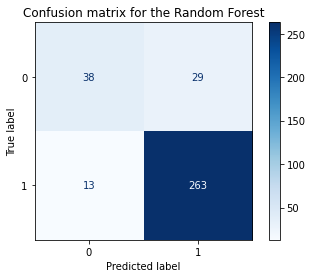

In [49]:
plot_confusion_matrix(thirdModel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for the Random Forest')
plt.show()

In [47]:
y_pred3 = thirdModel.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion matrix for the Random Forest: \n', cm3)
print('\nRandom Forest Accuracy score: ', accuracy_score(y_test, y_pred3))

Confusion matrix for the DecisionTree: 
 [[ 38  29]
 [ 13 263]]

DecisionTree Accuracy score:  0.8775510204081632


In [75]:
#Kernal Svm
from sklearn.svm import SVC
forthModel = SVC(C=3.0)
forthModel.fit(X_train, y_train)

SVC(C=3.0)

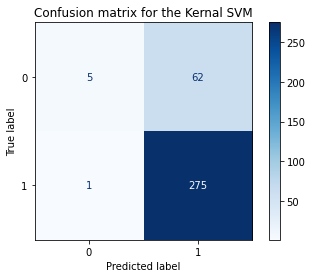

In [76]:
plot_confusion_matrix(forthModel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for the Kernal SVM')
plt.show()

In [77]:
y_pred4 = forthModel.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion matrix for the Kernal SVM: \n', cm4)
print('\nKernal SVM Accuracy score: ', accuracy_score(y_test, y_pred4))

Confusion matrix for the Kernal SVM: 
 [[  5  62]
 [  1 275]]

Kernal SVM Accuracy score:  0.8163265306122449


In [80]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
fifthModel = GaussianNB()
fifthModel.fit(X_train, y_train)

GaussianNB()

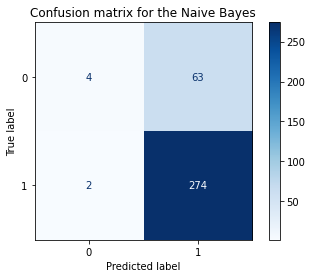

In [89]:
plot_confusion_matrix(fifthModel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for the Naive Bayes')
plt.show()

In [90]:
y_pred5 = fifthModel.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print('Confusion matrix for the Naive Bayes: \n', cm5)
print('\nNaive Bayes Accuracy score: ', accuracy_score(y_test, y_pred5))

Confusion matrix for the Naive Bayes: 
 [[  4  63]
 [  2 274]]

Naive Bayes Accuracy score:  0.8104956268221575


In [88]:
#See the models
print('===========================')
print('\nLogistic RegressionAccuracy score: ', accuracy_score(y_test, y_pred))
print('DecisionTree Accuracy score: ', accuracy_score(y_test, y_pred2))
print('Random Forest Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Kernal SVM Accuracy score: ', accuracy_score(y_test, y_pred4))
print('Naive Bayes Accuracy score: ', accuracy_score(y_test, y_pred5))
print('\n===========================')


Logistic RegressionAccuracy score:  0.8046647230320699
DecisionTree Accuracy score:  0.8046647230320699
Random Forest Accuracy score:  0.8775510204081632
Kernal SVM Accuracy score:  0.8163265306122449
Naive Bayes Accuracy score:  0.8104956268221575

